# Intro to Python in Chemistry

This lesson and subsequent ones aim to teach you about data visualization, data tidying, statistics, and a bit of Python coding. If you don't know how to code, don't worry! These lessons assume basic knowledge of code or Python. If you are new to Python, you may want to try the [intro to Python colab](https://colab.research.google.com/drive/1ltdsUiprT3O1kZIhEXF69ZJhHlqRPApx?usp=sharing)

A few things to start:

1.   These lessons only work in Google Chrome
2.   If you want to save your progress, go to File> Save a Copy in Drive; then locate a spot in your Drive folder
3.   You can save these notebooks and run offline as a Jupyter Notebook.

If you have questions, feel free to contact Dr. Chris Berndsen in the JMU Chemistry Department.



---
# Visualizing data

Data come in many types and can be analyzed in many ways. In Chemistry and Biochemistry, we sometimes use statistics to summarize the measurements, while other times we show the raw data such as measuring the absorbance of a sample. In most instances, both showing a plot and a summary table of statistics is helpful, especially when you have complex data. In this module, we will also introduce the basics of plotting data in Python using the `matplotlib` and `seaborn` packages. These packages will be the primary package for data visualization in later modules. We will also be using the `pandas` package for working with the speadsheets and dataframes.


In [ ]:
# load the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# note how we designated each of the packages after the as term

## Why visualize data?
Chemistry data often come in the form of numbers. Think about some of the values you may have determined in lab: mass, density, rate, absorbance, pH, etc. Comparison of a few measurements is easy, however as the size of the data increases, so does the complexity of the analysis required to make comparisons.



---
Below we will load data on the effect of temperature on the chirp rate of two species of crickets from *Mangiafico, S. 2015. "An R Companion for the Handbook of Biological Statistics."* and *McDonald, J. 2009. Handbook of Biological Statistics*. We will work to plot these data a few different ways while developing some sense of the best practices for displaying data. Press the play button to load the data and see how the data are organized.




In [ ]:
# import the data from github
url = 'https://raw.githubusercontent.com/CEBerndsen/r_colab_data/main/crickets_data.csv'
crdf = pd.read_csv(url)

# peek at the organization of the data
# how many rows
print("The data has", len(crdf), "rows")

# top 6 rows and columns
crdf.head()


The data have three columns `species`, `temp`, and `rate` with 31 rows of values. Let's take a look at with the basic `matplotlib` plot.
We first tell Python to use `matplotlib` by saying `plt`, then a dot and saying that we want to plot the data. Then, we indicate our x and y variables. Because the data are in a dataframe we have to indicate the data frame (`crdf` in this case) and the column. We choose the columns using brackets `[]` and the column name in quotes.

In [ ]:
plt.plot(crdf['temp'], crdf['rate'])

This plot is really bad and missing information that would be informative. See if you can identify some of the problems so that we can fix the plot.

---

Now that we have identified the issues, let's look at the [Matplotlib gallery](https://matplotlib.org/stable/plot_types/index.html) and the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) to identify a new plot and start improving.


Let's try to construct a scatter plot of the data.

Look at the code for the [scatter plots](https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py).

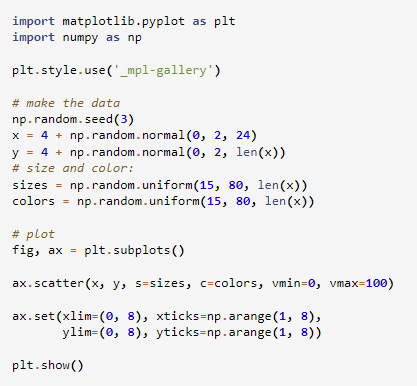


There is a lot here. At top is the package loading, which we already did. Then the data are made, which we also do not need to do since we have the crickets data. The code for plotting is at the bottom beneath the `# plot` line.

Let's break it down:


1.   `fig, ax = plt.subplot()` = Set up the plot
2.   `ax.scatter...` = indicate the x and y along with colors and axis lengths
3.   `ax.set...` = set limits and ticks
4.   `plt.show()` = show the plot

Now let's modify these settings to make a basic plot.



In [ ]:
# make a scatter plot
fig, ax = plt.subplots()

# indicate the x and y axes, let's skip colors and limits for now

# show the plot


The plot should look similar to below if your code worked.

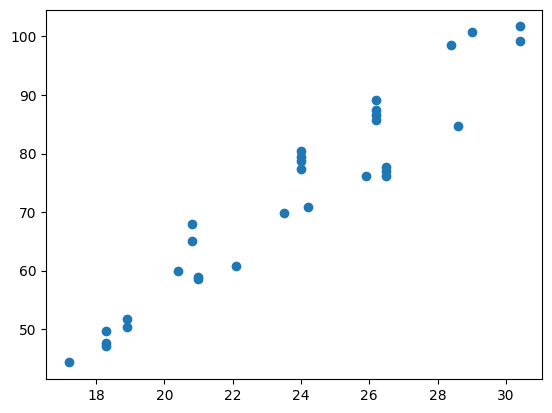

If it does not, try to figure out the issue, if it does, let's move forward.

***

We know the plot is minimally missing axes labels and color to differentiate the species.

In [ ]:
# copy the working code from above and add the needed elements


Matplotlib begins to struggle a bit with multivariable data which is where seaborn comes in. Seaborn builds on top of Matplotlib to make prettier plots and is *slightly* easier to use. So let's look at the [scatter plot in Seaborn example](https://seaborn.pydata.org/examples/different_scatter_variables.html), and start improving our plot by adapting the code in that example.

In [ ]:
# adapt your code for Seaborn to make a scatterplot
# see what changes still need to be made



# change code to color by species

In [ ]:
#@markdown Press the play button for one possible answer
g = (sns.scatterplot(x=crdf['temp'], y=crdf['rate'],
                hue=crdf['species']))
g.set(xlabel="Temp (C)", ylabel="Rate (chirps/min)")
plt.show()

Hopefully your plot showed the same information level as the example. So far we have made a nice figure comparing the effect of temperature on the two cricket species. But what about fitting a line to the data to quantitatively compare the data?  We can visualize this using Seaborn and the [`lmplot` function.](https://seaborn.pydata.org/examples/multiple_regression.html)

In [ ]:
# adapt the penguins example in the gallery to produce a scatter plot with two fitting lines on it with the crickets data

But what if we want the slope value and error to go along with the plot? For this we have to use NumPy and the `polyfit` function.

In [ ]:
# remove data from one of the species
excl = crdf[crdf.species == "O. exclamationis"]

# use polyfit to fit the data, the 1 means the equation is for a straight line
coeff = np.polyfit(excl.temp, excl.rate, 1)

# there will be two numbers in coeff, the slope and the y-intercept
print(coeff)

# now try to calculate the slope for the other species
# remember to use different dataframe and variable names